#        Twitter Sentiment Analysis(Natural Language Processing)



# Business Understanding

## Introduction
Understanding customer sentiment is key to maintaining a competitive edge in the tech industry, where perception can drive product success or failure. By leveraging Twitter data, businesses can monitor trends, assess satisfaction, and adapt to customer expectations. This project aims to construct a sentiment analysis model capable of classifying tweets about Apple and Google products into positive or negative sentiments

## Problem Statement
Apple and Google have built their reputations as industry leaders by cultivating strong customer trust and positive public perception. Today, as consumers turn to social media platforms like Twitter to voice their thoughts, it has become vital for these companies to understand and respond to customer sentiment. To meet this challenge, algorithms capable of detecting and classifying user sentiments have become an essential tool for brand and product strategies.

## Objectives
- To apply **text preprocessing and vectorization** techniques to prepare the Twitter data for effective model training.

- To develop a **binary sentiment** classifier to distinguish between positive and negative tweets, as a baseline.
- To evaluate classifier performance using appropriate metrics such as F1-score, precision and recall, particularly for imbalanced classes.

- To provide actionable data-driven insights and recommendations.

## Data understanding
This step involves conducting an exploratory data analysis (EDA) to understand the dataset’s characteristics. Using key Python libraries such as pandas, numpy, and matplotlib, I examine the available features, assess their data types, and check for missing values or anomalies. This process provides valuable insights into the dataset’s quality and structure, ensuring it is well-understood before moving on to the subsequent stages of cleaning, preprocessing, and vectorization.

The dataset provides three main features:

- `tweet_text`: The core content of the tweet, which serves as the text input for sentiment classification.

- `emotion_in_tweet_is_directed_at`: Identifies the target entity (e.g., Apple, Google) of the emotion expressed in the tweet.

- `is_there_an_emotion_directed_at_a_brand_or_product`: A binary label indicating whether the tweet conveys an emotion toward a brand or product, used as the classification target.


In [1]:
#import libraries
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Data loading and inspection

This stage will involve loading the csv dataset and interact with it by getting to know the info,summarry statistics,missing values and handling them.

In [2]:
!ls

index.ipynb
judge-1377884607_tweet_product_company.csv


In [3]:
#load the datset and check the first 5 rows
df=pd.read_csv('judge-1377884607_tweet_product_company.csv',encoding="latin-1")
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [4]:
#summary statistics
df.describe()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
count,9092,3291,9093
unique,9065,9,4
top,RT @mention Marissa Mayer: Google Will Connect...,iPad,No emotion toward brand or product
freq,5,946,5389


In [5]:
#checking info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


From the above output we can see that their are 3 features with 9093 total entries but feature with index id 1 has some missing values which will go ahead and drop them

Let us rename the columns for easy readability and understanding

In [6]:
#renaming columns names
df.rename(columns={
    'tweet_text': 'tweet',
    'emotion_in_tweet_is_directed_at': 'brand_target',
    'is_there_an_emotion_directed_at_a_brand_or_product': 'emotion_flag'
}, inplace=True)


In [7]:
## checking unique counts
df['emotion_flag'].value_counts()

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: emotion_flag, dtype: int64

From the above output its clear that we have four classes,for our binary classification we will focus on postive and negative emotion

In [8]:
def clean_data(df):
    # Check for missing values
    print("Missing values before dropping:")
    print(df.isnull().sum())
    print(f"Total missing values: {df.isnull().sum().sum()}")
    print("-" * 50)

    # Drop missing values
    df_clean = df.dropna()
    print("Missing values dropped.")
    print(f"Remaining missing values: {df_clean.isnull().sum().sum()}")
    print("-" * 50)

    # Check for duplicates
    num_duplicates = df_clean.duplicated().sum()
    print(f"Duplicate rows before dropping: {num_duplicates}")

    # Drop duplicates
    df_clean = df_clean.drop_duplicates()
    print("Duplicates dropped.")
    print(f"Remaining duplicate rows: {df_clean.duplicated().sum()}")
    print("-" * 50)

    return df_clean


In [9]:
df = clean_data(df)
df


Missing values before dropping:
tweet              1
brand_target    5802
emotion_flag       0
dtype: int64
Total missing values: 5803
--------------------------------------------------
Missing values dropped.
Remaining missing values: 0
--------------------------------------------------
Duplicate rows before dropping: 9
Duplicates dropped.
Remaining duplicate rows: 0
--------------------------------------------------


,tweet,brand_target,emotion_flag
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9077,@mention your PR guy just convinced me to swit...,iPhone,Positive emotion
9079,&quot;papyrus...sort of like the ipad&quot; - ...,iPad,Positive emotion
9080,Diller says Google TV &quot;might be run over ...,Other Google product or service,Negative emotion
9085,I've always used Camera+ for my iPhone b/c it ...,iPad or iPhone App,Positive emotion


## Exploratory Data Analysis

In this stage we will undertake the following steps:

 i)Check for distribution of tweet lengths by visualzing number of characters in a tweet and also through a data frame.
 
 ii)Check for frequency and proportion of each emotion to check for class imbalances which is useful in modeling.
 
 iii)Check for emotion distribution by brand
 
 iv)Number of times brand has been mentioned/Brand frequency in descending order


#### i)checking for distribution of tweet length

In [10]:
def generate_columns(df):
    df['chars'] = df['tweet'].apply(len)
    df['words'] = df['tweet'].apply(lambda x: len(nltk.word_tokenize(x)))
    df['sentences'] = df['tweet'].apply(lambda x: len(nltk.sent_tokenize(x)))
    return df

# apply to df
df = generate_columns(df)

# show first 10 rows
df.head()


,tweet,brand_target,emotion_flag,chars,words,sentences
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,127,32,5
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,139,29,3
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,79,20,2
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,82,21,2
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,131,29,1


The above code defines and applies a function called generate_columns that adds three new features to the dataset based on the text of the tweets.

What the function does:

-`chars`: Counts the number of characters in each tweet.

-`words`: Counts the number of words in each tweet using NLTK’s word_tokenize.

-`sentences`: Counts the number of sentences in each tweet using NLTK’s sent_tokenize.

These features help describe the structure and length of the tweets,let us visualize below

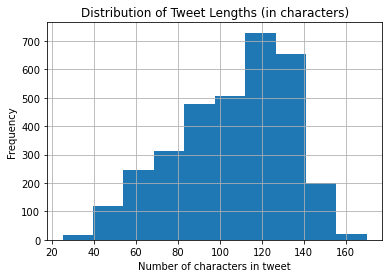

In [11]:
import matplotlib.pyplot as plt

df['tweet'].apply(len).hist()
plt.xlabel("Number of characters in tweet")
plt.ylabel("Frequency")
plt.title("Distribution of Tweet Lengths (in characters)")
plt.show()



The above histogram shows that the data is roughly normally distributed but positively skewed to the right as its tail is longer than the left.The peak mode is around the middle right of the x axis range.(peak 120 characters in a tweet)

#### ii) Checking for frequency and proportion of each emotion

<AxesSubplot:>

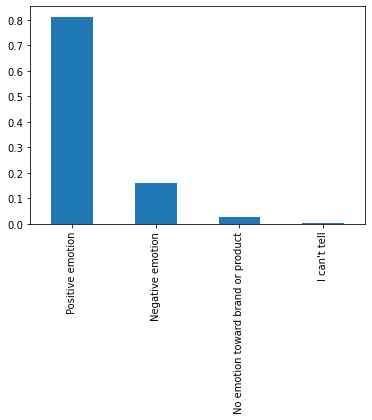

In [12]:
df['emotion_flag'].value_counts(normalize=True).plot(kind='bar')


From the above output we can see that most tweets are those that contain positive emotion we will later check to see how these different emotions are directed towards google and apple products.From the output also we can see their some class imbalances.

#### iii) Emotions Distribution by brand
We have already checked the overall emotion distribution now lets check,emotional distribution towards different brands using a stacked bar chart

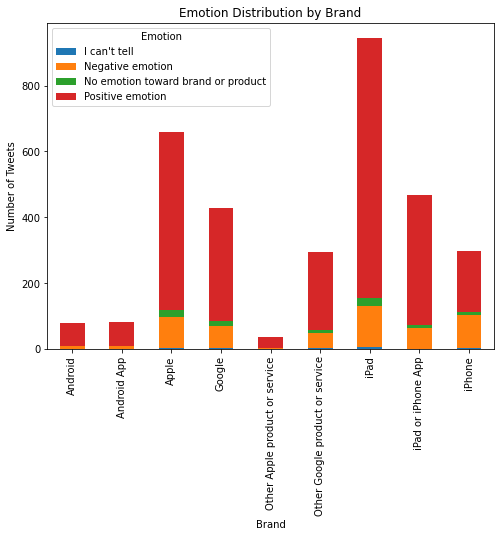

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# compute counts of emotion per brand
ct = pd.crosstab(df['brand_target'], df['emotion_flag'])

# plot
ct.plot(kind='bar', stacked=True, figsize=(8,6))
plt.xlabel("Brand")
plt.ylabel("Number of Tweets")
plt.title("Emotion Distribution by Brand")
plt.legend(title="Emotion")
plt.show()


#### iv) Brand frequency in descending order
This checks the number of times the brand of item has been mentioned overall in this dataset, we will also visualize the output in terms of average brand mentions in the cells following below

In [14]:
brand_counts = df['brand_target'].value_counts().to_dict()
df['brand_freq'] = df['brand_target'].map(brand_counts)


In [15]:
df.groupby('brand_target')['brand_freq'].mean().sort_values(ascending=False)

brand_target
iPad                               945
Apple                              659
iPad or iPhone App                 469
Google                             428
iPhone                             296
Other Google product or service    293
Android App                         80
Android                             77
Other Apple product or service      35
Name: brand_freq, dtype: int64

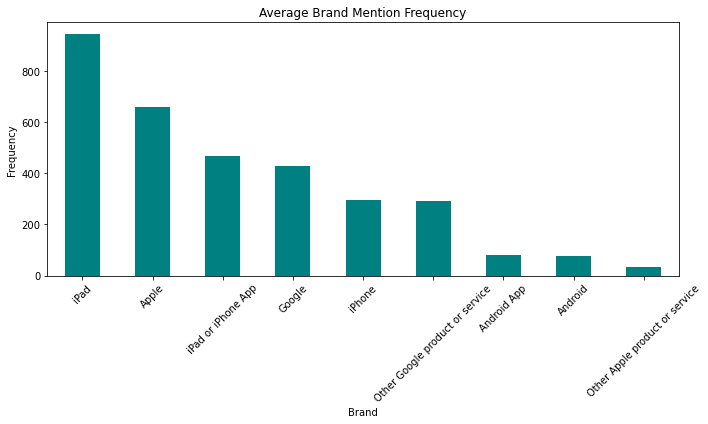

In [16]:
import matplotlib.pyplot as plt

# Prepare data
brand_freq_means = df.groupby('brand_target')['brand_freq'].mean().sort_values(ascending=False)

# Plot histogram
plt.figure(figsize=(10,6))
brand_freq_means.plot(kind='bar', color='teal')
plt.title('Average Brand Mention Frequency')
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Data cleaning and Preprocessing

With the help of the function below i will perform several cleaning and preprocessing steps:

* Remove URLs: Removes links (e.g., http://... or www...) from the text.

* Remove mentions & hashtags: Removes usernames (e.g., @user) and hashtags (e.g., #topic).

* Remove punctuation & numbers: Keeps only alphabetic characters and spaces.

* Lowercase text: Converts all characters to lowercase for consistency.

* Remove extra spaces: Replaces multiple spaces with a single space and strips leading/trailing spaces.

* Expand contractions: Converts common contractions (e.g., can’t → cannot, don’t → do not).

* Remove stopwords: Eliminates common English stopwords (e.g., the, is, and, at) which may not add value to sentiment prediction.

* Lemmatize words: Reduces words to their base form (e.g., running → run, better → good).


In [17]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# data cleaning function
def clean_data(text):
    text = re.sub(r'http\S+|www.\S+', '', text)          # Remove URLs
    text = re.sub(r'@\w+|#\w+', '', text)                # Remove mentions/hashtags
    text = re.sub(r'[^A-Za-z\s]', '', text)              # Fix regex range
    text = text.lower()
    text = re.sub(r'\s+', ' ', text).strip()

    # Contraction handling
    text = re.sub(r"can't", "cannot", text)
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"'re", " are", text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])

    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    
    return text


In [18]:
df['tweet_cleaned'] = df['tweet'].apply(clean_data)


### label encoding

Here i seek to convert the sentiment label,"emotional_flag" into numerical values for binary classification by:
* Filtering the dataset and Keeping only rows where emotion_flag is either 'Positive emotion' or 'Negative emotion'.
* Encoding the label and  mapping;
      Positive emotion=1
      Negative emotion=2





In [19]:
#label encoding the emotion_flag target
df = df[df['emotion_flag'].isin(['Positive emotion', 'Negative emotion'])].copy()
df['label'] = df['emotion_flag'].map({'Positive emotion': 1, 'Negative emotion': 0})


#### Splitting data into training and testing
We going to split the data into training and testing sets to prepare for model training and evaluation by using the cleaned tweets  as the input data and the newly created label and uses a random state of 42 for reproducibility

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    df['tweet_cleaned'], df['label'],
    test_size=0.2, stratify=df['label'], random_state=42
)


In [21]:
#checking the shape 
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (2545,)
X_test shape: (637,)
y_train shape: (2545,)
y_test shape: (637,)


In [22]:
#checking proportions of classes
print("Training set class distribution:")
print(y_train.value_counts(normalize=True))

print("\nTest set class distribution:")
print(y_test.value_counts(normalize=True))


Training set class distribution:
1    0.837328
0    0.162672
Name: label, dtype: float64

Test set class distribution:
1    0.836735
0    0.163265
Name: label, dtype: float64


#### Performing vectorization 
We are going to convert the cleaned tweet text into numerical feature using the TF-IDF (Term Frequency–Inverse Document Frequency) technique, which captures the importance of words and word combinations in the tweets.

The code below

* Learns the vocabulary and term weights from the training data (fit_transform).

* Applies the same transformation to the test data (transform) without leaking test information into training.

*  Includes unigrams and bigrams (because of ngram_range=(1,2)) to capture more context.

*  Limits to the top 5000 features to avoid overfitting and reduce computation.

*  Removes common English stopwords which do not add meaningful information.

In [23]:
#TF-IDF on text on training data then tranform both sets
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=5000, stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)




## Modeling
In modeling i am going to build a logistic regression model as our baseline model and there after try other models in a pipeline

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Pipeline with only classifier
text_clf = Pipeline([
    ('clf', LogisticRegression(
        solver='liblinear', 
        random_state=42,
        class_weight='balanced'
    ))
])

# Fit the pipeline on already-vectorized data
text_clf.fit(X_train_vec, y_train)

# Predict
y_pred = text_clf.predict(X_test_vec)

# Evaluate
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.47      0.62      0.54       104
           1       0.92      0.86      0.89       533

    accuracy                           0.83       637
   macro avg       0.70      0.74      0.72       637
weighted avg       0.85      0.83      0.83       637

[[ 65  39]
 [ 72 461]]


From the above output our logistic regression gathers an accuracy of 83% but favours class 1 you can tell by the higher precision of 92%.The F1 Score is 89 % for class 1 and 54% for class 0

     *True Negatives (TN): 65

     * False Positives (FP): 39

     *False Negatives (FN): 72

     *True Positives (TP): 461

### Hyperparameter Tuning with Grid Search

To optimize the Logistic Regression model, we performed hyperparameter tuning using GridSearchCV.  
We tested different values of the regularization parameter `C` and the `class_weight` setting to find the combination that maximizes the F1-score as shown below

The Grid Search evaluated the following hyperparameters:
- `C`: Controls the strength of regularization (smaller values → stronger regularization). We tested values like 0.01, 0.1, 1, 10.
- `class_weight`: Balances the classes to account for imbalances in the dataset. We tested both `None` and `'balanced'`.

After evaluating all combinations using 5-fold cross-validation and F1-score as the metric, the best configuration found was:
- **Best parameters:** `C=10`, `class_weight=None`
- **Best cross-validated F1-score:** ~0.931

This indicates that the model performed best without adjusting the class weights and with a relatively high `C` (less regularization), suggesting that the data does not require strong regularization and class balancing in this case.


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the base model
lr = LogisticRegression(max_iter=1000)

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'class_weight': [None, 'balanced']
}

# Create GridSearchCV
grid = GridSearchCV(
    estimator=lr,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

# Fit to training data
grid.fit(X_train_vec, y_train)

# Best results
print("Best parameters:", grid.best_params_)
print("Best F1-score:", grid.best_score_)


Best parameters: {'C': 10, 'class_weight': None}
Best F1-score: 0.9314508041739373


In [30]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

# Shared vectorizer
tfidf = TfidfVectorizer(preprocessor=clean_data,
                        ngram_range=(1, 2),
                        max_features=5000,
                        stop_words='english')

# Pipelines
pipelines = {
    'Random Forest': Pipeline([
        ('tfidf', tfidf),
        ('clf', RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42))
    ]),
    'Naive Bayes': Pipeline([
        ('tfidf', tfidf),
        ('clf', MultinomialNB())
    ]),
    'XGBoost': Pipeline([
        ('tfidf', tfidf),
        ('clf', XGBClassifier(n_estimators=100, random_state=42, 
                              use_label_encoder=False, eval_metric='logloss'))
    ])
}


In [31]:
from sklearn.metrics import classification_report, confusion_matrix

for name, pipeline in pipelines.items():
    print(f"\n=== {name} ===")
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))


=== Random Forest ===


c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['le'] not in stop_words.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.79      0.26      0.39       104
           1       0.87      0.99      0.93       533

    accuracy                           0.87       637
   macro avg       0.83      0.62      0.66       637
weighted avg       0.86      0.87      0.84       637

[[ 27  77]
 [  7 526]]

=== Naive Bayes ===
              precision    recall  f1-score   support

           0       0.92      0.12      0.21       104
           1       0.85      1.00      0.92       533

    accuracy                           0.85       637
   macro avg       0.89      0.56      0.56       637
weighted avg       0.86      0.85      0.80       637

[[ 12  92]
 [  1 532]]

=== XGBoost ===
[20:16:57] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to 

### Model Comparison Results

We compared three classifiers (Random Forest, Naive Bayes, XGBoost) for sentiment classification.  
Below are their performances on the test set:

| Model           | Accuracy | F1-score (class 0) | F1-score (class 1) |
|-----------------|----------|--------------------|--------------------|
| Random Forest   | 0.87     | 0.39               | 0.93               |
| Naive Bayes     | 0.85     | 0.21               | 0.92               |
| XGBoost         | 0.83     | 0.25               | 0.91               |

**Observations:**
- All models performed well in identifying class 1 (positive sentiment), with high recall and F1-scores.
- Performance on class 0 (negative sentiment) was poor across all models, likely due to class imbalance.
- Random Forest achieved the highest overall accuracy (87%) and best balance between precision & recall.

**Next Steps:**
- Explore techniques to address class imbalance, such as resampling or adjusting class weights.
- Perform hyperparameter tuning to improve performance, particularly on class 0.



## using grid search and hyperparameter tuning the 3 models

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier

# Define scorer that focuses on class 0
f1_class0 = make_scorer(f1_score, pos_label=0)

# ==============================
#  Random Forest
# ==============================
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced', None]
}

rf_grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=rf_param_grid,
    scoring=f1_class0,
    cv=5,
    n_jobs=-1,
    verbose=2
)

print("\n Tuning Random Forest...")
rf_grid.fit(X_train_vec, y_train)
print(" Best RF params:", rf_grid.best_params_)
print(" Best RF F1 (class 0):", rf_grid.best_score_)


# ==============================
#  Naive Bayes
# ==============================
nb_param_grid = {
    'alpha': [0.5, 1.0, 1.5]  # smoothing parameter
}

nb_grid = GridSearchCV(
    estimator=MultinomialNB(),
    param_grid=nb_param_grid,
    scoring=f1_class0,
    cv=5,
    n_jobs=-1,
    verbose=2
)

print("\n Tuning Naive Bayes...")
nb_grid.fit(X_train_vec, y_train)
print(" Best NB params:", nb_grid.best_params_)
print(" Best NB F1 (class 0):", nb_grid.best_score_)


# ==============================
#  XGBoost
# ==============================
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1],
    'scale_pos_weight': [1, 5, 10]
}

xgb_grid = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_grid=xgb_param_grid,
    scoring=f1_class0,
    cv=5,
    n_jobs=-1,
    verbose=2
)

print("\n Tuning XGBoost...")
xgb_grid.fit(X_train_vec, y_train)
print(" Best XGB params:", xgb_grid.best_params_)
print(" Best XGB F1 (class 0):", xgb_grid.best_score_)



 Tuning Random Forest...
Fitting 5 folds for each of 48 candidates, totalling 240 fits
 Best RF params: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
 Best RF F1 (class 0): 0.4892415252696556

 Tuning Naive Bayes...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
 Best NB params: {'alpha': 0.5}
 Best NB F1 (class 0): 0.3851099001409954

 Tuning XGBoost...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
[20:34:45] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


 Best XGB params: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'scale_pos_weight': 1}
 B